In [1]:
import ipywidgets as widgets
from IPython.display import display
import pandas as pd
from core_functions import *
import os

Note before starting:
    <p>All data files must be in data/ folder<p>
    <p>All results will be generated in results/ folder including an image (in PNG) and an Excel file<p>

In [2]:
dbn = dropdown()
display(dbn)
filename = filename_groups()
display(filename)
filenameGO = filename_GO()
display(filenameGO)
mngene = min_gene_intersected()
display(mngene)
fs = pval_thres()
display(fs)
try:
    os.stat('../results/')
except:
    os.mkdir('../results/')       

Select the database to perform the functional enrichment:


Select the groups file


OPTIONAL - Select a file with list of gene sets to enrich (filter):


Minimum of genes intersecting gene set


Corrected P-value (Q-value) threshold


## Functional enrichment

Working on.... cluster0
Working on.... cluster1
Working on.... cluster2
Working on.... cluster3
Working on.... cluster4
Working on.... cluster7
Working on.... cluster9


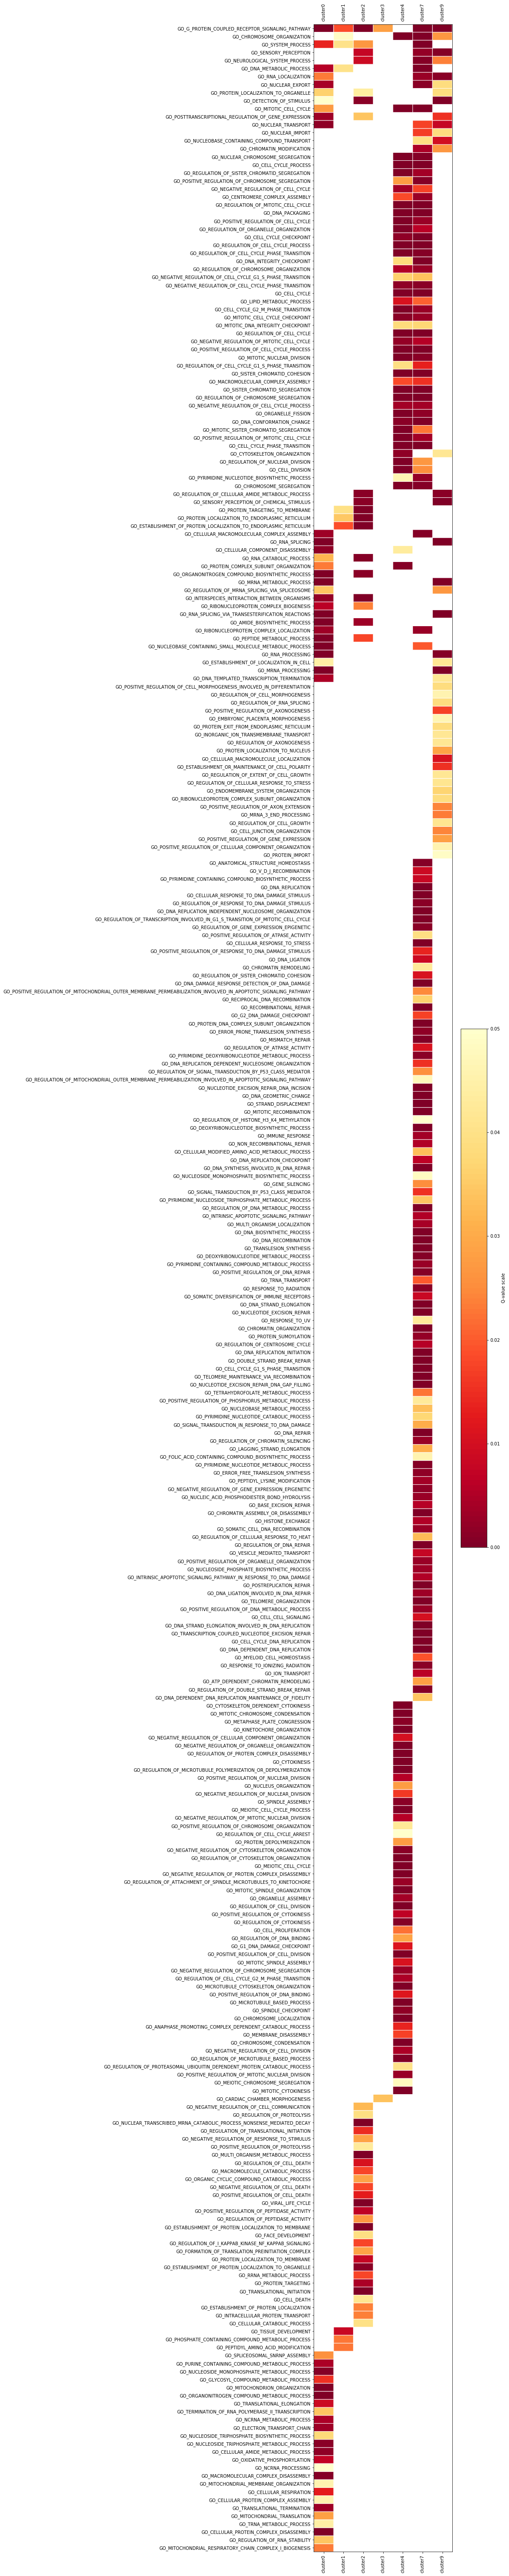

In [3]:
if filename.value == 'No_file':
    print('PLEASE SPECIFY A GROUP FILE. It should be in data/ folder')
else:
    #Load data
    allgenes,genesets,cluster_genes,clusters = load_data(filename.value,dbn.value)
    
    #Functional enrichment
    allenrichment_results = enrichment_all_groups(genesets,mngene.value,filenameGO.value,allgenes,cluster_genes,float(fs.value))
    
    if len(allenrichment_results) > 0:
        outname = filename.value.split('.')[0]+'_'+dbn.value.replace('.gmt','')
        
        #Plot heatmap
        plot_heatmap(allenrichment_results,clusters,cluster_genes,float(fs.value))

        #Generate tabe with all results
        allenrichment_results[['GROUP','TERM','TERM_GENE_SET_SIZE','PVALUE','QVALUE','ENRICHED_GENES']].to_excel('../results/'+outname+'.xls',index=False)
    else:
        print('Any gene set from',dbn.value,'was enriched by',filename.value)

Explanation of the excel file generated
<li>GROUP: name of the user gene set of interest</li>
<li>TERM: pathway enriched</li>
<li>TERM_GENE_SET_SIZE: number of genes in pathway enriched</li>
<li>PVALUE: P-value of the enrichment</li>
<li>QVALUE: Corrected P-values (FDR bh) of the enrichment (the one to look at!)</li>
<li>ENRICHED_GENES: list of genes in the pathway and in the user gene set</li>